# l  Base Classifacation
tf.keras.datasets.mnist, tf.keras.datasets.fashion_mnist   

In [87]:
from __future__ import absolute_import,division,print_function,unicode_literals

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np

10000/10000 [==============================] - 1s 65us/sample - loss: 142.1311 - acc: 0.1121


[142.1310849609375, 0.1121]

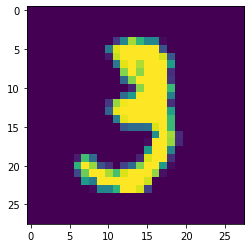

In [119]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
plt.imshow(x_train[10,:,:])

model = tf.keras.models.Sequential([layers.Flatten(input_shape=(28,28)), 
                                   layers.Dense(512,activation='relu'),
                                   layers.Dropout(0.3),
                                   layers.Dense(10,activation='softmax')])

callak = [tf.keras.callbacks.EarlyStopping(patience=2, monitor='acc')]

model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.fit(x_train,y_train,epochs=20,callbacks=callak)
model.evaluate(x_test,y_test)

In [121]:
fashion_datasets = tf.keras.datasets.fashion_mnist
(x_train,y_train), (x_test, y_test) = fashion_datasets.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [82]:
# 未归一化 0.8206
# 归一化  0.9218   10个百分点的差距我曹...
x_train = x_train/255.
x_test = x_test/255.

In [118]:
# x_train, x_valid, y_train, y_valid  = train_test_split(x_train,y_train, test_size=0.3,random_state=2019)
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
# train_dataset = train_dataset.repeat(10).batch(32).shuffle(10)
# valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid,y_valid))
# valid_dataset = valid_dataset.repeat(10).batch(32).shuffle(10)
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

# loss,acc,val_loss patience 选择回影响精度 我的实验表明选择3会有好点的效果
callak = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='loss')]


model.compile('rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# model.fit(x_train,y_train,callbacks=callak,epochs=20,batch_size=32)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.5390 - acc: 0.8746
Ankle boot
Ankle boot


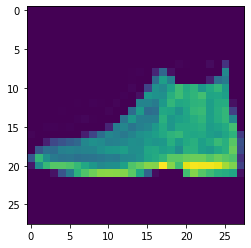

In [92]:
model.evaluate(x_test,y_test)
predicts = model.predict(x_test)
print(class_names[np.argmax(predicts[0])])
plt.imshow(x_test[0,:,:])
print(class_names[y_test[0]])

In [105]:
# 概率是多少， truelabel  predictlabel
def plot_pred_true(i,predictions,true_img,class_names):
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img = x_test[i]
    true_name = class_names[np.argmax(predictions[i])]
    predict_name = class_names[np.argmax(predictions[i])]
    if true_name == predict_name:
        color = 'blue'
    else:
        color='red'
    plt.imshow(img,cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(predict_name, 100*np.max(predictions[i]),true_name),color=color)

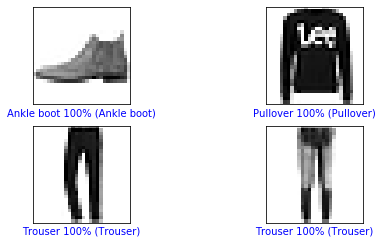

In [117]:
# plot_pred_true(5,predicts,x_test,class_names)

num_rows = 2
num_columns = 2
num_images = num_rows * num_columns
plt.figure(figsize=(2*2*num_columns,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_columns,2*i+1)
    plot_pred_true(i,predicts,x_test,class_names)

# II Text Classif